
<h3> Cleaning and Giving Insight on Instacart Shopping Habits <h3>
<div> My mission is to give useful information on Instacart shoppers. What products perform best? When do people place orders(time of day / day of week / month)? How frequent do customers return? How many products does a typical person buy? These will all be answered throughout my analysis and cleaning of the data provided!
<div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
insta_cart_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
insta_cart_df.info() #checking general info
insta_cart_df.head() #looking at rows to see incorrect or correct formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products_df = pd.read_csv('/datasets/products.csv', sep=';')
products_df.info() #checking general info
products_df.head() #looking at rows to see incorrect or correct formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products_df.info(show_counts=True) #checking general info
order_products_df.head() #looking at rows to see incorrect or correct formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles_df.info() #checking general info
aisles_df.head() #looking at rows to see incorrect or correct formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
departments_df.info() #checking general info
departments_df.head() #looking at rows to see incorrect or correct formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
insta_cart_df['order_id'].duplicated().sum()

15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
display(insta_cart_df[(insta_cart_df['order_dow'] == 3) & (insta_cart_df['order_hour_of_day'] == 2)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [48]:
# Remove duplicate orders
insta_cart_df = insta_cart_df.drop_duplicates().reset_index(drop=True)

In [10]:
# Double check for duplicate rows
insta_cart_df.duplicated().reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
478947,478947,False
478948,478948,False
478949,478949,False
478950,478950,False


In [11]:
# Double check for duplicate order IDs only
insta_cart_df['order_id'].duplicated().sum()

0

### `products` data frame

In [12]:
# Check for fully duplicate rows
products_df.duplicated().sum()

0

Checked the entire products DataFrame for duplicates.

In [13]:
# Check for just duplicate product IDs
products_df.duplicated(subset='product_id').sum()

0

Checked for duplicates in the single column 'product_id'

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df['product_name'].value_counts(dropna=False)
display(products_df['product_name'].duplicated().sum())

1361

First line, lowered all string values in 'product_name' and counted NaN values in second line.

<font color='red'> we have a total of 1361 duplicates </font>

In [15]:
# Check for duplicate product names that aren't missing
duplicate_counts = products_df['product_name'].dropna().value_counts()
total_duplicates = duplicate_counts[duplicate_counts > 1].sum()
print(total_duplicates)

207


First I checked duplicates by dropping NaN values

<font color='red'> These are ambiguous entries in 'product_name' column non inclusive of NaN values. We are missing some labeling in the products.</font>

### `departments` data frame

In [16]:
#checking for duplicates in departments dataframe
departments_df.duplicated().sum()

0

In [17]:
#checked for NaN values 
departments_df.isna().sum()

department_id    0
department       0
dtype: int64

Conclusion: There are no missing or NaN values in departments DataFrame.

### `aisles` data frame

In [18]:
#checking for duplicates in aisles dataframe
aisles_df.duplicated().sum()

0

In [19]:
#checking for NaN values
aisles_df.isna().sum()

aisle_id    0
aisle       0
dtype: int64

Conclusion: There are no missing or NaN values in aisles DataFrame

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
order_products_df.duplicated().sum()

0

In [21]:
# Double check for any other tricky duplicates
order_products_df.duplicated(subset=['order_id', 'product_id']).sum()


0

Checked for duplicates first then used subset= parameter to check for tricky duplicates in 'order_id' and 'product_id'.

## Find and remove missing values


### `products` data frame

In [22]:
products_df.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_values = products_df[products_df['product_name'].isna()]
nan_aisle = (missing_values['aisle_id'] == 100)
print(nan_aisle.sum())

1258


Selected NaN values out of 'product_name' and assigned it to a variable.
Created variable applying my NaN values to a conditional of aisles equaling 100

In [24]:
# Are all of the missing product names associated with department ID 21?
department_missing = (missing_values['department_id'] == 21)
print(department_missing.sum())

1258


Used my prior variable to another conditional in 'department_id' column pulling only 21 ID number.

In [25]:
# What is this ailse and department?
print(aisles_df[aisles_df['aisle_id'] == 100])
print()
print(departments_df[departments_df['department_id'] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [26]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('unknown')
products_df.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Filled the NaN values with 'unknown'
As well as re-checked to make sure there were no NaN values in the column anymore

Conclusion: There were 1258 NaN values in the products dataframe. Specifically 'product_name' column I applied conditionals to find that all missing values were in aisle 100 and all had a department ID of 21. I proceeded with renaming the NaN values with 'unknown' to make it clearer.

### `orders` data frame

In [27]:
insta_cart_df.isna().sum()

index                         0
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [28]:
# Are there any missing values where it's not a customer's first order?
missing_instacart = insta_cart_df[insta_cart_df['days_since_prior_order'].isna()]
missing_past_day1 = (missing_instacart['days_since_prior_order'] > 1)
print(missing_past_day1.sum())

0


### `order_products` data frame

In [29]:
# Checking missing values sum
order_products_df.isna().sum() 

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [30]:
# What are the min and max values in this column?
display(order_products_df['add_to_cart_order'].min())
display(order_products_df['add_to_cart_order'].max())

1.0

64.0

In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values = order_products_df[order_products_df['add_to_cart_order'].isna()]
order_id_missing = missing_values['order_id'].unique()
print(order_id_missing)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


First I applied the NaN values to a variable. Then I applied that variable to another column to check for those unique attributes. 

In [32]:
# Do all orders with missing values have more than 64 products?
missing_product_count = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']

problematic_orders = order_products_df[order_products_df['order_id'].isin(missing_product_count)]

problematic_orders = problematic_orders.groupby('order_id')['product_id'].count()

check_problematic_orders = problematic_orders > 64

display(check_problematic_orders.min())


True

I first pulled missing products which then could apply with .isin which then I grouped by and used logical operator to find my result specifically with columns 'order_id' and 'product_id'.

In [33]:
# Replace missing values with 999 and convert column to integer type
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999).astype('int')

#checking general info after changes
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Replaced missing values in 'add_to_cart_order' column with 999 also switched column to integer type.

### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print("Range of 'order_hour_of_day':", insta_cart_df['order_hour_of_day'].min(), "to", insta_cart_df['order_hour_of_day'].max())
print("Range of 'order_dow':", insta_cart_df['order_dow'].min(), "to", insta_cart_df['order_dow'].max())

Range of 'order_hour_of_day': 0 to 23
Range of 'order_dow': 0 to 6


Here I have pulled the ranges from both <font color='red'> 'order_hour_of_day' </font>  and <font color='red'> 'order_dow' </font>  This leads me to my conclusion these values are sensible. 

### What time of day do people shop for groceries?

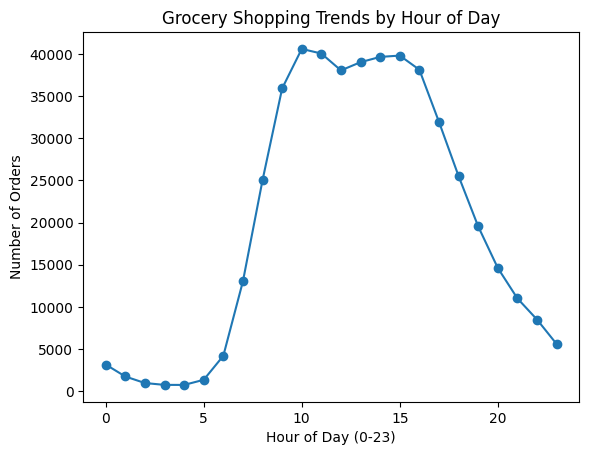

In [35]:
# Calculate hourly order counts
hourly_order_counts = insta_cart_df['order_hour_of_day'].value_counts().sort_index()

# Plot the data
hourly_order_counts.plot(x='hour',
                         y='orders',
                         title='Grocery Shopping Trends by Hour of Day',
                         style='o-',
                         xlabel="Hour of Day (0-23)",
                         ylabel="Number of Orders",
                         legend=False)

# Show the plot
plt.show()

Conclusion is the most shopped time of day is at around 11 am.

### What day of the week do people shop for groceries?

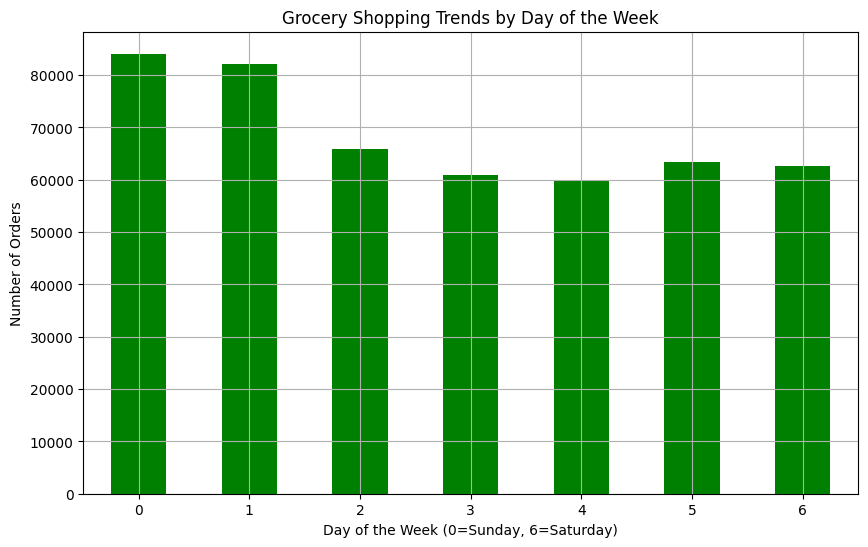

In [36]:
# Group by 'order_dow' (day of the week) and count the number of orders for each day
daily_order_counts = insta_cart_df['order_dow'].value_counts().sort_index()

# Plot the data
daily_order_counts.plot(kind='bar',
                        color='green',
                        grid=True,
                        ylabel='Number of Orders',
                        xlabel='Day of the Week (0=Sunday, 6=Saturday)',
                        rot=0,
                        title='Grocery Shopping Trends by Day of the Week',
                        figsize=(10, 6))

# Show the plot
plt.show()

From this plot we can conclude the most shopped days are sunday(0) and monday(1). The lowest day shopped is thursday(4)

### How long do people wait until placing another order?

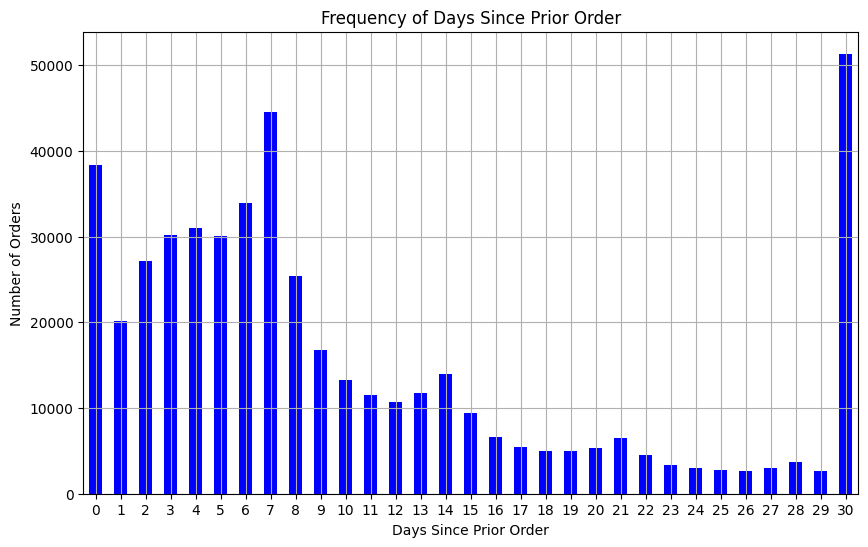

In [50]:
#fixed to int :)
insta_cart_df['days_since_prior_order'] = insta_cart_df['days_since_prior_order'].fillna(0).astype(int)
# Group by 'days_since_prior_order' and count the occurrence
days_count = insta_cart_df['days_since_prior_order'].value_counts().sort_index()

# Plot bar chart
days_count.plot(kind='bar',
                color='blue',
                xlabel='Days Since Prior Order',
                ylabel='Number of Orders',
                title='Frequency of Days Since Prior Order',
                figsize=[10,6],
                rot=0,
                grid=True)
 
# Show plot
plt.show()

Plot shows there is a high frequency in buying after 7 days (about 44,000 orders) after last order. Also most commonly placed orders are 30 days (about 51,000 orders) after last order.

# From all the plots:

I can conclude that the most shopped times are at 11 a.m. on sundays and mondays with a frequency of re-purchasing 7 days or 30 days after last purchase.

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [38]:
#Defining days and orders on those days

wednesday_orders = insta_cart_df[insta_cart_df['order_dow'] == 3]['order_hour_of_day']
saturday_orders = insta_cart_df[insta_cart_df['order_dow'] == 6]['order_hour_of_day']


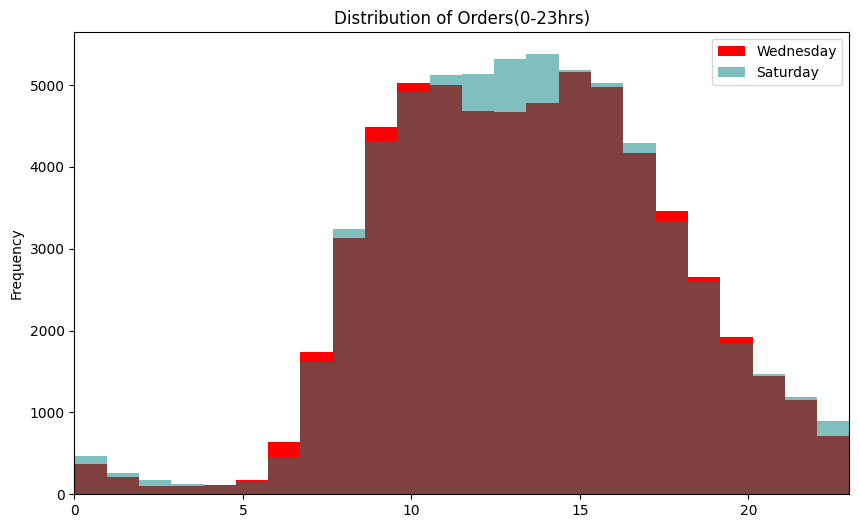

In [39]:
wednesday_orders.plot(kind='hist', color='red', bins=24, figsize=(10,6))
saturday_orders.plot(kind='hist',
                     color='teal',
                     alpha=0.5,
                     bins=24,
                     xlim=(0,23),
                     xlabel='Hour of Day / (0-23)',
                     title='Distribution of Orders(0-23hrs)')
plt.legend(['Wednesday', 'Saturday'])

<font color='red'>conclusion </font>  Saturdays are more shopped than wednesdays.

### What's the distribution for the number of orders per customer?

In [40]:
order_per_customer = insta_cart_df.groupby('user_id')['order_number'].max()
orders_df = pd.DataFrame({'orders': order_per_customer})
print(orders_df)

         orders
user_id        
2             4
4             6
5             4
6             4
7            19
...         ...
206203        2
206206       66
206207       14
206208       34
206209       13

[157437 rows x 1 columns]


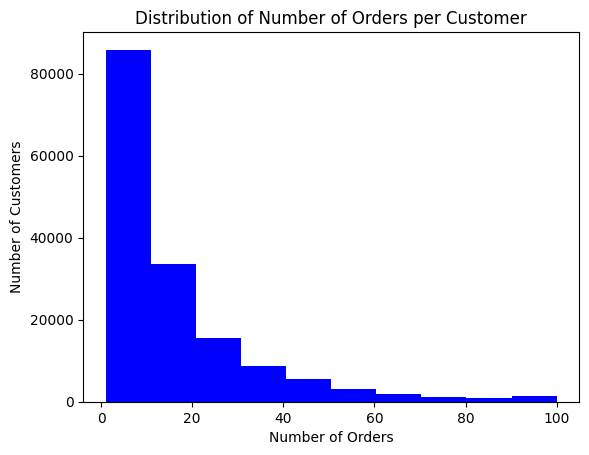

In [41]:
orders_df.plot(
    y='orders',
    kind='hist',
    color='blue',
    legend=False,
    title='Distribution of Number of Orders per Customer',
)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

Conclusion the most amount of orders per customer is 1-10 

### What are the top 20 popular products (display their id and name)?

In [42]:
product_counts = order_products_df['product_id'].value_counts()

product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['product_id', 'order_count']

top_products = product_counts_df.merge(products_df[['product_id', 'product_name']], on='product_id')

top_20_products = top_products.head(20)

top_20_products_sorted = top_20_products.sort_values('order_count', ascending=True)


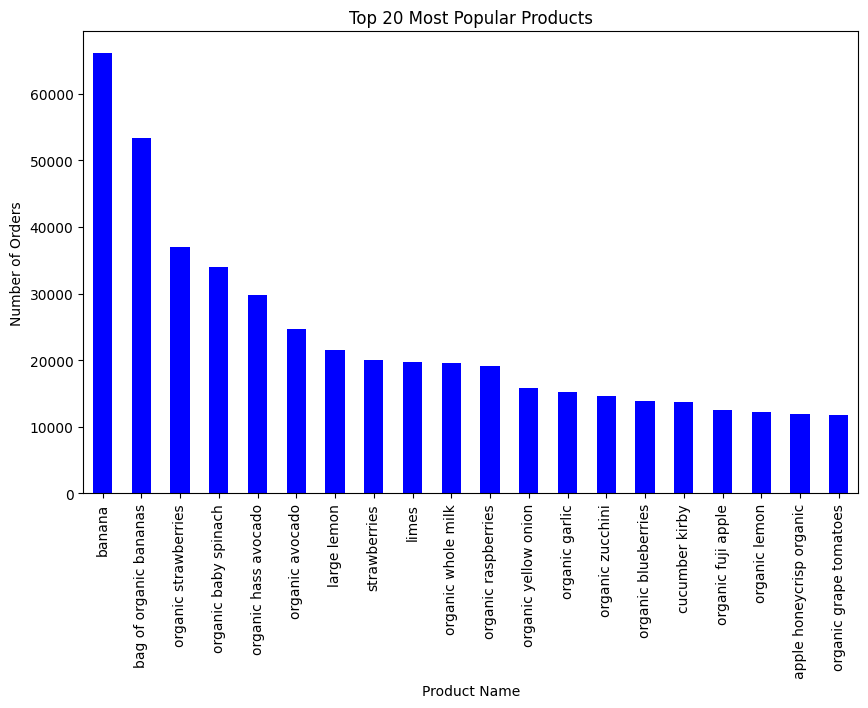

In [43]:
top_20_products_sorted = top_20_products.sort_values('order_count', ascending=False)

top_20_products_sorted.plot(kind='bar',
                            x='product_name',
                            y='order_count',
                            color='blue',
                            figsize=(10, 6),
                            legend=False,title=
                            'Top 20 Most Popular Products',
                            xlabel='Product Name',
                            ylabel='Number of Orders')


plt.show()

Conclusion is that instacarts top 20 products are fruits, vegetables, and dairy.

### How many items do people typically buy in one order? What does the distribution look like?

Median number of items in an order: 8


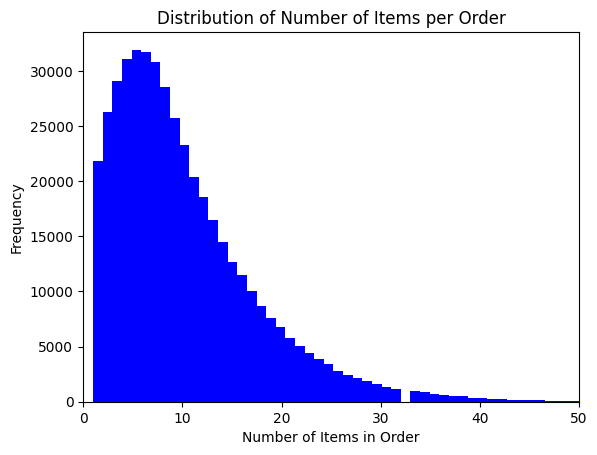

In [44]:

item_per_order = order_products_df.groupby('order_id')['product_id'].count()

median_items_per_order = item_per_order.median().astype(int)
print("Median number of items in an order:", median_items_per_order)

item_per_order.plot(kind='hist', 
                    bins=130, 
                    color='blue', 
                    title='Distribution of Number of Items per Order', 
                    ylabel='Frequency', 
                    xlim=(0, 50))
plt.xlabel('Number of Items in Order')
plt.show()


The typical amount bought per person is usually around 5-10 items which then start to decline.


### What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [45]:
reordered_products = order_products_df[order_products_df['reordered'] == 1]
top_20_products = reordered_products['product_id'].value_counts().head(20)
display(top_20_products)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64

In [46]:

top_20_products = top_20_products.reset_index()
top_20_products.columns = ['product_id', 'count']
most_popular = top_20_products.merge(products_df, on='product_id')
display(most_popular)

,product_id,count,product_name,aisle_id,department_id
0,24852,55763,banana,24,4
1,13176,44450,bag of organic bananas,24,4
2,21137,28639,organic strawberries,24,4
3,21903,26233,organic baby spinach,123,4
4,47209,23629,organic hass avocado,24,4
5,47766,18743,organic avocado,24,4
6,27845,16251,organic whole milk,84,16
7,47626,15044,large lemon,24,4
8,27966,14748,organic raspberries,123,4
9,16797,13945,strawberries,24,4


Conclusion is the top 20 products are produce items we can gather valuable information in count, aisle, department. A lot of general important information. This not only tells us the top 20 in general but what does best in order with bananas being a favorite!

<h2> 
    Conclusion

Here I have come to a conclusion that the top products on Instacart are:

fruit, dairy, and vegetables.
 
A typical person usually purchases 5 - 10 items on average per order.

The most active shopping times range from 9 a.m. and 5 p.m.

The most active days for shopping are Sundays and Mondays.

Customers typically re-purchase a month after.

With all of this information we can now create better business strategies. On specific deals enticing more or new customers. We could send out re-targeting emails to bring customers back more often than 30 days. 